In [2]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
train_df = pd.DataFrame({'t': range(8),
       'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
   columns = ['t', 'survival_rate'])



In [5]:
train_df

,t,survival_rate
0,0,1.000
1,1,0.869
2,2,0.743
3,3,0.653
4,4,0.593
5,5,0.551
6,6,0.517
7,7,0.491


In [6]:
train_df.corr()

,t,survival_rate
t,1.000000,-0.960199
survival_rate,-0.960199,1.000000


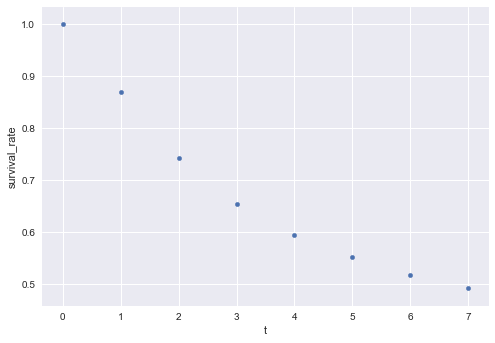

In [7]:
train_df.plot(kind = 'scatter', x = 't', y = 'survival_rate')

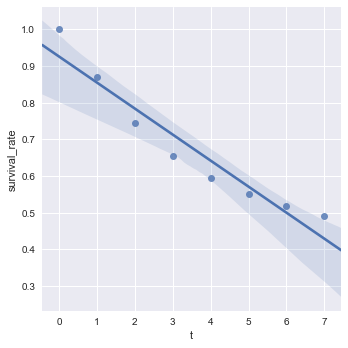

In [9]:
sns.lmplot(x = 't', y = 'survival_rate', data = train_df)

In [11]:
model = smf.ols(formula = 'survival_rate ~ t', data = train_df).fit()

model.summary()

/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           0.000153
Time:                        19:45:40   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000       0.839       1.012
t             -0.0709      0.008     -8.421      0.000      -0.092      -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
###simple linear regression is survival_rate = 0.9254 - 0.0709 * time



In [19]:
predict_x = pd.DataFrame({'t': [8, 9, 10]}, columns = ['t'])
predict_x = sm.add_constant(predict_x)

In [20]:
predict_x

,const,t
0,1.0,8
1,1.0,9
2,1.0,10


In [21]:
predict_y = model.predict(predict_x)

In [22]:
predict_y

0    0.357893
1    0.286952
2    0.216012
dtype: float64